* https://github.com/mubaris/friendly-fortnight
* https://mubaris.com/2017/10/01/kmeans-clustering-in-python/


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)

In [28]:
df = pd.read_csv("pima_indians_diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [29]:
X = df[['Glucose','BloodPressure','BMI']]
y = df[['Outcome']]

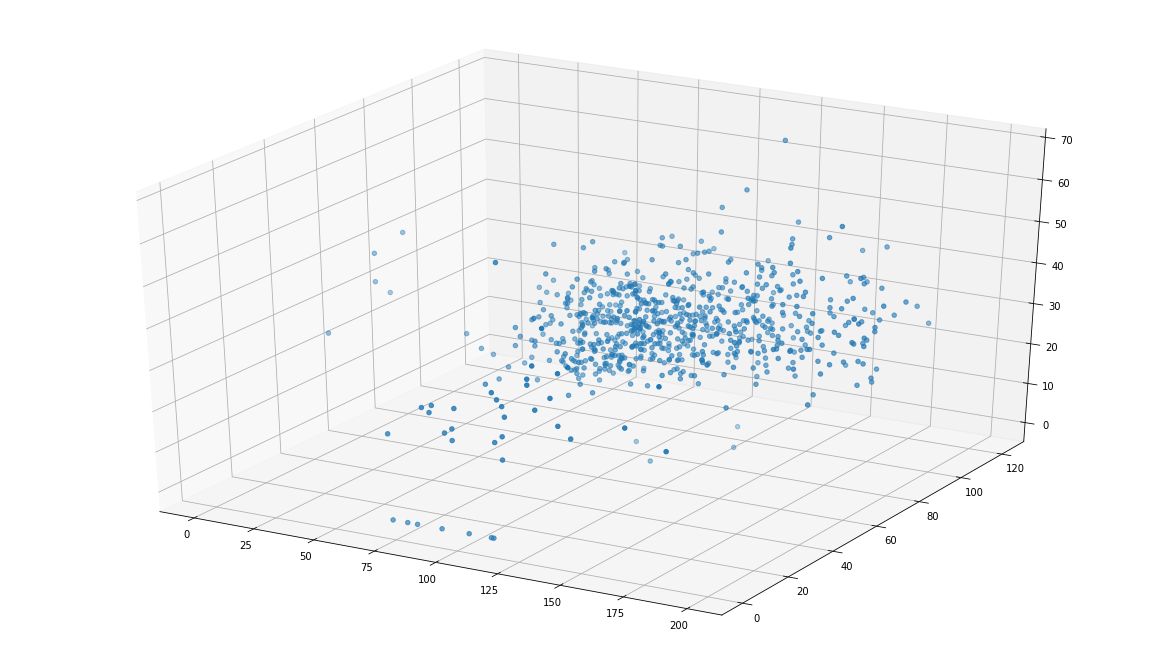

In [30]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X['Glucose'], X['BloodPressure'], X['BMI'])

In [31]:
# Initializing KMeans
kmeans = KMeans(n_clusters=2)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
print(C)

[[154.16961131  74.98233216  34.23180212]
 [101.47835052  65.67628866  30.68597938]]


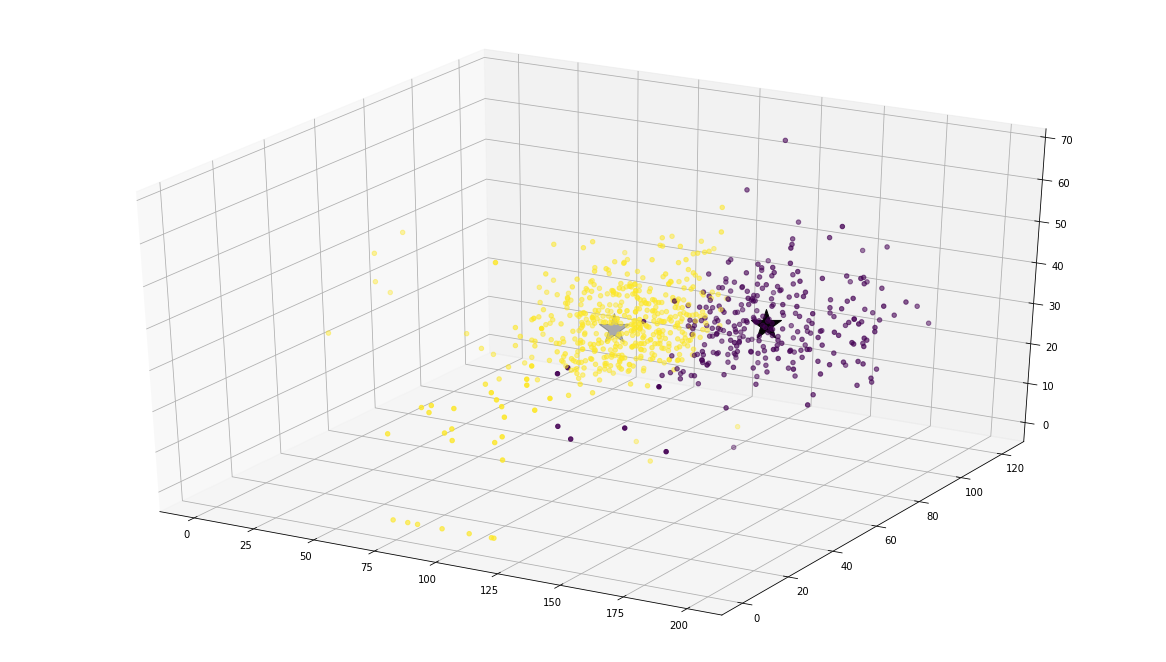

In [32]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X['Glucose'], X['BloodPressure'], X['BMI'], c=labels)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

In [33]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
        'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df[['Outcome']]

In [34]:
# Initializing KMeans
kmeans = KMeans(n_clusters=2)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
print(C)

[[  3.88391376 115.26699834  68.09784411  17.6185738   32.21227197
   31.17363184   0.43757048  33.11442786]
 [  3.7030303  141.46060606  72.78787879  31.2        253.70909091
   34.98545455   0.59724848  33.7030303 ]]


In [35]:
df_result = pd.concat([df.reset_index(), pd.Series(labels)], axis=1)

In [36]:
df_result.columns = ['Index','Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
        'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome','Cluster']

In [37]:
df_result.head()

Index  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      0            6      148             72             35        0  33.6   
1      1            1       85             66             29        0  26.6   
2      2            8      183             64              0        0  23.3   
3      3            1       89             66             23       94  28.1   
4      4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Cluster  
0                     0.627   50        1        0  
1                     0.351   31        0        0  
2                     0.672   32        1        0  
3                     0.167   21        0        0  
4                     2.288   33        1        1

In [38]:
df_result.query('Outcome != Cluster')

Index  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        0            6      148             72             35        0  33.6   
2        2            8      183             64              0        0  23.3   
6        6            3       78             50             32       88  31.0   
9        9            8      125             96              0        0   0.0   
11      11           10      168             74              0        0  38.0   
..     ...          ...      ...            ...            ...      ...   ...   
757    757            0      123             72              0        0  36.3   
759    759            6      190             92              0        0  35.5   
761    761            9      170             74             31        0  44.0   
763    763           10      101             76             48      180  32.9   
766    766            1      126             60              0        0  30.1   

     DiabetesPedigreeFunction  Age  Outcome  Cluster  
0                       0.627   50        1        0  
2                       0.672   32        1        0  
6                       0.248   26        1        0  
9                       0.232   54        1        0  
11                      0.537   34        1        0  
..                        ...  ...      ...      ...  
757                     0.258   52        1        0  
759                     0.278   66        1        0  
761                     0.403   43        1        0  
763                     0.171   63        0        1  
766                     0.349   47        1        0  

[261 rows x 11 columns]

In [39]:
# define X and y
X = df[['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Glucose']]

y = df['Outcome']

In [40]:
# split X and y |into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [41]:
from sklearn.ensemble import RandomForestClassifier

# instantiate model
model = RandomForestClassifier(random_state=1, max_depth=10)

# fit model
model.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [42]:
# make estimations for the testing set
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [43]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.roc_auc_score(y_test, y_pred))

0.7662337662337663
0.7252525252525253


In [45]:
y_pred = model.predict(X)

In [46]:
df_result = pd.concat([df_result.reset_index(), pd.Series(y_pred)], axis=1)

In [47]:
df_result.head()

index  Index  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0      0      0            6      148             72             35        0   
1      1      1            1       85             66             29        0   
2      2      2            8      183             64              0        0   
3      3      3            1       89             66             23       94   
4      4      4            0      137             40             35      168   

    BMI  DiabetesPedigreeFunction  Age  Outcome  Cluster  0  
0  33.6                     0.627   50        1        0  1  
1  26.6                     0.351   31        0        0  0  
2  23.3                     0.672   32        1        0  1  
3  28.1                     0.167   21        0        0  0  
4  43.1                     2.288   33        1        1  1